In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score,
    recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report
)

import warnings
warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv("data/customer_churn.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   PaperlessBilling  500 non-null    object
 7   SeniorCitizen     500 non-null    int64 
 8   Churn             500 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


In [7]:
df.isnull().sum()


CustomerID          0
Tenure              0
MonthlyCharges      0
TotalCharges        0
Contract            0
PaymentMethod       0
PaperlessBilling    0
SeniorCitizen       0
Churn               0
dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_encoded)


scaler = StandardScaler()
df_clean = df.drop("CustomerID", axis=1)
X = df_clean.drop("Churn", axis=1)
y = df_clean["Churn"]
X_encoded = pd.get_dummies(X, drop_first=True)


X_encoded.head()
scaled_data.shape




(500, 9)

In [14]:
df.dtypes


CustomerID          object
Tenure               int64
MonthlyCharges       int64
TotalCharges         int64
Contract            object
PaymentMethod       object
PaperlessBilling    object
SeniorCitizen        int64
Churn                int64
dtype: object

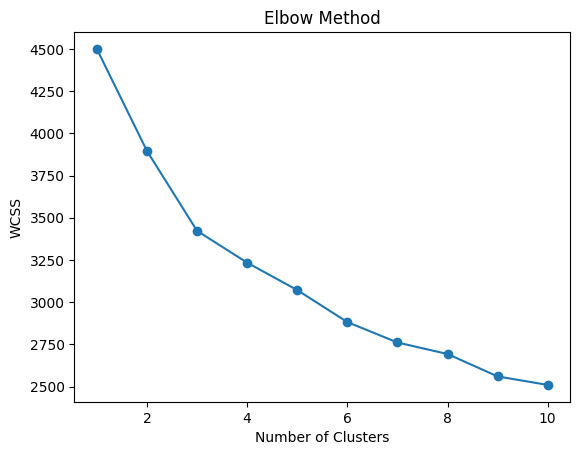

In [20]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()


In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["KMeans_Cluster"] = kmeans.fit_predict(scaled_data)

df.head()


,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn,KMeans_Cluster
0,C00001,6,64,1540,One year,Credit Card,No,1,0,1
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0,2
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0,0


In [22]:
hierarchical = AgglomerativeClustering(n_clusters=3)
df["Hierarchical_Cluster"] = hierarchical.fit_predict(scaled_data)


In [23]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(scaled_data)


In [ ]:
segment_summary = df.groupby("KMeans_Cluster").mean(numeric_only=True)
segment_summary


TypeError: agg function failed [how->mean,dtype->object]